In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as slmodel
import matplotlib.pyplot as plt

In [2]:
table = pd.read_excel('RPL.xlsx', 'Лист1')
table.head()

,Место,Клуб,Матчи,Победы,Ничьи,Поражения,Забито,Пропущено,Разница,Очки
0,1,Спартак,30,16,10,4,51,30,21,58
1,2,Локомотив,30,16,9,5,53,22,31,57
2,3,Зенит,30,15,9,6,50,34,16,54
3,4,Торпедо,30,15,7,8,51,40,11,52
4,5,Крылья Советов,30,14,8,8,38,22,16,50


# Зависимость очков от забитых мяче

In [48]:
x = table['Забито'].values.reshape(-1, 1)
y = table.loc[:,'Очки'].values

In [50]:
model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(4.790171859179246, array([1.00390613]))

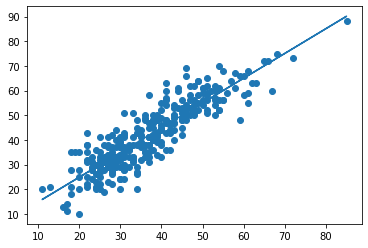

In [55]:
plt.scatter(table['Забито'], table['Очки'])
x1 = [model.coef_[0] * x + model.intercept_ for x in table['Забито'].values]
plt.plot([*table['Забито'].values], x1 )
plt.show()

# Сбивка с реальным расчетом очков в таблице премьер лиги и модели


In [74]:
x = table.iloc[:,3:-4].values
y = table.loc[:,'Очки'].values

In [76]:
model = slmodel.LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(-7.105427357601002e-15,
 array([3.00000000e+00, 1.00000000e+00, 1.11022302e-16]))

In [78]:
f'y = (({model.coef_[0]})*Побед+({model.coef_[1]})*Ничьи + ({model.coef_[2]})*Поражения +({model.intercept_})'

'y = ((3.0000000000000018)*Побед+(0.9999999999999979)*Ничьи + (1.1102230246251565e-16)*Поражения +(-7.105427357601002e-15)'